In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
#os.chdir('/home/crangel/PycharmProjects/EleccionesVenezuela2017/src/')
from data_treatment import update_dataframe
%matplotlib inline


In [2]:
#"/home/crangel/PycharmProjects/EleccionesVenezuela2017/data/EDO_DELTA_AMACURO.json"
df_deltaA =pd.read_json("../data/EDO_DELTA_AMACURO.json",lines=True)
df_Merida =pd.read_json("../data/EDO_MERIDA.json",lines=True)
df_Vargas =pd.read_json("../data/EDO_VARGAS.json",lines=True)
df_MONAGAS =pd.read_json("../data/EDO_MONAGAS.json",lines=True)

df_MONAGAS.columns

new = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS',
       u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',
       u'municipio', u'parroquia','Abstencion_%',u'PSUV_%',u'PSUV_N',
       u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',u'municipio_residual',u'centro_residual',u'estado_residual', u'parroquia_standarised_residual',
       u'municipio_standarised_residual',    u'centro_standarised_residual',
          u'estado_standarised_residual']



In [3]:
#DELTA AMACURO
df_out_deltaAmacuro = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')[new]

#MONAGAS
df_out_MONAGAS = update_dataframe(df_MONAGAS,'YELITZE SANTAELLA','GUILLERMO CALL')[new]

#MERIDA
df_out_Merida = update_dataframe(df_Merida,'JEHYSON GUZMAN','RAMON GUEVARA')[new]

# VARGAS
df_out_Vargas = update_dataframe(df_Vargas, 'JORGE GARCIA CARNEIRO', 'JOSE MANUEL OLIVARES')[new]

frames = [df_out_Merida,df_out_deltaAmacuro,df_out_MONAGAS,df_out_Vargas]
df_out = pd.concat(frames)

df_out_deltaAmacuro.columns

Index([                    u'ABSTENCION',                          u'ACTAS',
                     u'ACTAS ESCRUTADAS',                  u'ACTAS VALIDAS',
         u'ELECTORES ACTAS TRANSMITIDAS',            u'ELECTORES INSCRITOS',
                  u'VOTANTES ESCRUTADOS',               u'VOTOS ESCRUTADOS',
                          u'VOTOS NULOS',                  u'VOTOS VALIDOS',
                               u'centro',                         u'estado',
                                 u'mesa',                      u'municipio',
                            u'parroquia',                   u'Abstencion_%',
                               u'PSUV_%',                         u'PSUV_N',
                                u'MUD_%',                          u'MUD_N',
                           u'rescaled_N',             u'parroquia_residual',
                   u'municipio_residual',                u'centro_residual',
                      u'estado_residual', u'parroquia_standarised_residual',

Index([                    u'ABSTENCION',                          u'ACTAS',
                     u'ACTAS ESCRUTADAS',                  u'ACTAS VALIDAS',
         u'ELECTORES ACTAS TRANSMITIDAS',            u'ELECTORES INSCRITOS',
                  u'VOTANTES ESCRUTADOS',               u'VOTOS ESCRUTADOS',
                          u'VOTOS NULOS',                  u'VOTOS VALIDOS',
                               u'centro',                         u'estado',
                                 u'mesa',                      u'municipio',
                            u'parroquia',                   u'Abstencion_%',
                               u'PSUV_%',                         u'PSUV_N',
                                u'MUD_%',                          u'MUD_N',
                           u'rescaled_N',             u'parroquia_residual',
                   u'municipio_residual',                u'centro_residual',
                      u'estado_residual', u'parroquia_standarised_residual',

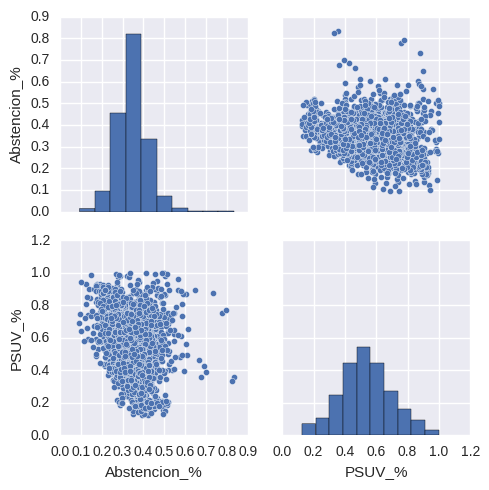

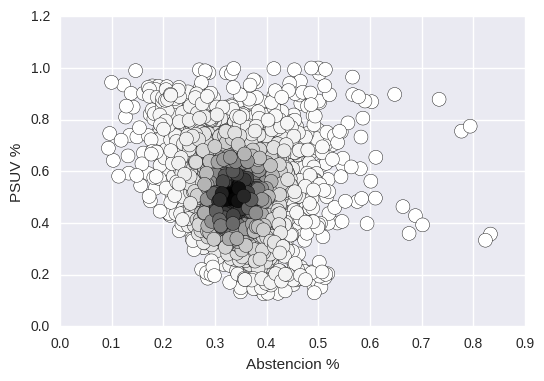

(-0.16363080453931389, 1.9786775580424663e-18)


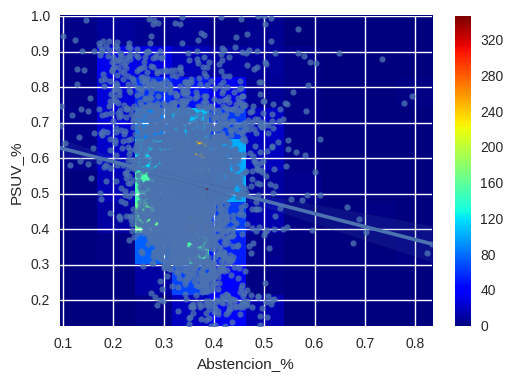

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr


print df_out.columns
sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=100)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()

plt.hist2d(df_out['Abstencion_%'],  df_out['PSUV_%'], (10, 10), cmap=plt.cm.jet)
plt.colorbar()

sns.regplot(x="Abstencion_%", y="PSUV_%", data=df_out);

print pearsonr(df_out["Abstencion_%"], df_out["PSUV_%"])


[u'PQ. CARACCIOLO PARRA PJARDIN DE INFANCIA ELOY PAREDES', u'PQ. JUAN RODRIGUEZ SUAREZCOLEGIO NUESTRA SENORA DEL ROSARIO', u'PQ. JUAN RODRIGUEZ SUAREZESCUELA BASICA ESTADO LARA', u'PQ. EL LLANOPREESCOLAR ANANIAS AVENDANO', u'PQ. ANICETO LUGOESCUELA NACIONAL NUMERO 95', u'PQ. MONS. ARGIMIRO GARCIALICEO DIONISIO LOPEZ ORIHUELA', u'CM. TEMBLADORUNIDAD EDUCATIVA LIBERTADOR BOLIVAR', u'PQ. ALTOS DE LOS GODOSESCUELA BASICA VICTORIA RAMIREZ MOLINOS', u'PQ. LAS COCUIZASCOMPLEJO EDUCATIVO NACIONAL LEONARDO INFANTE', u'PQ. SAN SIMONLICEO NACIONAL FRANCISCO ISNARDI', u'PQ. SAN SIMONLICEO NACIONAL IDELFONSO NUNEZ MARES', u'PQ. SAN SIMONLICEO NACIONAL MIGUEL JOSE SANZ', u'PQ. SAN SIMONUNIDAD EDUCATIVA PRIVADA CECILIO ACOSTA']
-0.0010020645428
0.999271420428


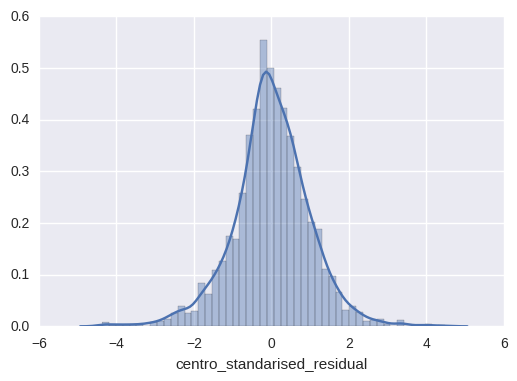

In [5]:
import math
sns.distplot(df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'],hist_kws={'weights':df_out[df_out['centro_standarised_residual']!=0]['VOTOS VALIDOS']})

list_centros = list(df_out[df_out['centro_standarised_residual']<-3]['centro'])

print list_centros


print df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual'].std()


-0.692857012689
1.09605845628
0.138017134102
0.856297253003
416857
434833


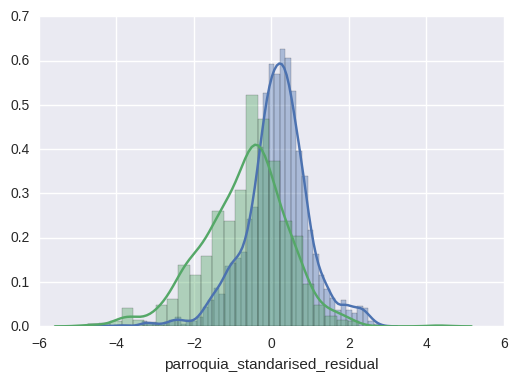

In [6]:
sns.distplot(df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual'],hist_kws={'weights':df_out[df_out['centro_standarised_residual']!=0]['VOTOS VALIDOS']});
sns.distplot(df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'],hist_kws={'weights':df_out[df_out['centro_standarised_residual']==0]['VOTOS VALIDOS']});

print df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].std()

print df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual'].mean()
print df_out[df_out['centro_standarised_residual']!=0]['parroquia_standarised_residual'].std()

#sns.distplot(df_out['PSUV_%']);
print df_out[df_out['centro_standarised_residual']!=0]['PSUV_N'].sum()
print df_out[df_out['centro_standarised_residual']!=0]['VOTOS VALIDOS'].sum()- df_out[df_out['centro_standarised_residual']!=0]['MUD_N'].sum()

1017855

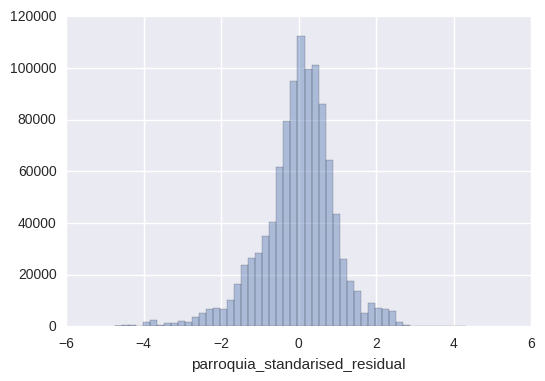

In [7]:
sns.distplot(df_out['parroquia_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});

list_centros = list(df_out[df_out['parroquia_standarised_residual']<2]['centro'])


df_out[df_out['centro']==list_centros[0]]

df_out[df_out['parroquia_standarised_residual']<2]['VOTOS VALIDOS'].sum()-df_out[df_out['parroquia_standarised_residual']>2]['VOTOS VALIDOS'].sum()

#df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS']-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS']

#df_out['parroquia_standarised_residual'].mean()

#df_out['parroquia_standarised_residual'].kurt()



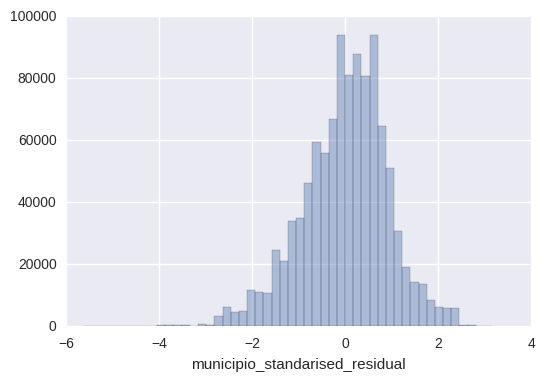

In [8]:
sns.distplot(df_out['municipio_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});


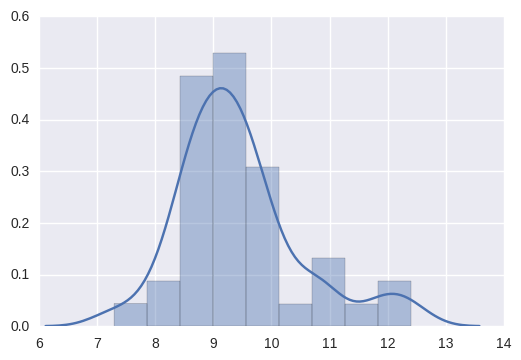

In [9]:
import math

list_centros = np.unique(df_out['municipio'])

rescaled_v = []
for i in list_centros:
    
    df = df_out[df_out['municipio']==i]
    
    rescaled_v.append(math.log(df['VOTOS VALIDOS'].sum()-df['PSUV_N'].sum()/float(df['PSUV_N'].sum())))
    
    
sns.distplot(np.array(rescaled_v));


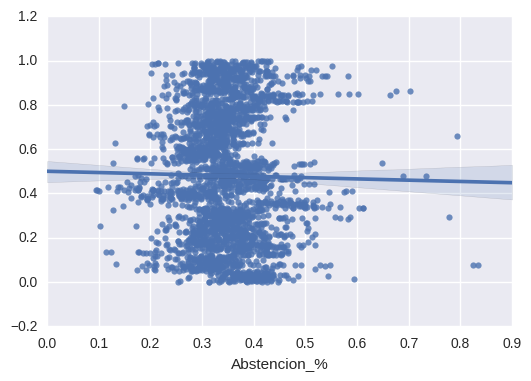

In [10]:
l = list(df_out.set_index('Abstencion_%').cumsum()['PSUV_N']/df_out['PSUV_N'].sum())
a = df_out['Abstencion_%']



sns.regplot(df_out['Abstencion_%'], np.array(l));

